# HIDROGEOLOGÍA AMBIENTAL
## Creación de gráficos hidrogeoquímicos
### Prof. Adriana Piña Fulano
Código para generar gráficos hidrogeoquímicos utilizando el paquete de libre distribución WQChartPy.

In [3]:
#Importar módulos
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt



In [2]:
#intala paquete WQChartpy
#%pip install wqchartpy

In [1]:
from IPython.display import display, Image

## Cargar base de datos
Es posible cargar archivos .csv, excel, txt. En este ejercicio se muestra cómo trabajar con archivos .csv.

In [4]:
df = pd.read_csv('Datos/PlantillaFQO.csv')

## Mostrar los datos
El archivo incluye una columna con la información del nombre de la muestra (Sample), etiqueta (Label) los parámetros fisicoqupimicos ($pH$, $Ca^{2+}$, $Mg^{2+}$, $Na^+$, $HCO_3^-$, $CO_3^{2-}$, $Cl^-$, $SO_4^{2+}$ y $TDS$) en mg/L o meq/L.
La columna Color, Marker, Size y ALpha, permiten definir el color, el símbolo, el tamaño y la transparencia a utilizar en las figuras por muestra.

In [6]:
print(df.head())

   Unnamed: 0                          Sample Label    Color Marker  Size  \
0           0    Aj-01-0095_105515.0_118785.0    C4  #000000      o    20   
1           1     Aj-11-0201_98171.0_117716.0    C4  #000000      o    20   
2           2  Pe-02-0007_102459.06_106724.35    C4  #000000      o    20   
3           3    Pz-01-0022_105349.3_116984.8    C4  #000000      o    20   
4           4  Pz-01-0023_105342.96_117147.98    C3  #000000      o    20   

   Alpha    pH     Ca    Mg    Na  K  HCO3  CO3     Cl    SO4    TDS  
0    0.6  5.43   8.88  1.20  0.20  0  13.5    0  20.07   6.26    5.3  
1    0.6  6.11  32.29  0.45  1.30  0  30.3    0   2.42   4.13   11.0  
2    0.6  5.69   0.64  1.87  6.81  0  15.0    0  17.17  10.83    4.0  
3    0.6  5.68   0.65  0.41  0.86  0   6.0    0  32.73   0.78    4.0  
4    0.6  5.53  51.78  0.84  0.14  0  57.0    0  21.53  25.12  396.0  


# Colores y símbolos
Se pueden seleccionar los colores obteniendo los códigos en páginas como esta:
https://htmlcolorcodes.com/es/

Y en la siguiente se encuentra un listado de simbolos para utilizar:
https://matplotlib.org/stable/api/markers_api.html


## Diagrama de Gibbs
El diagrama de Gibbs (1970) relaciona los sólidos disuletos totales como función de la dominanción de $Na^+$ o $Ca^{2+}$ y $Cl^-$ o $HCO_3^-$, ilustrando los procesos de calidad de agua en una cáscara de nuez. A bajas concentraciones disueltas, el agua lluvia sin mucha reacción geoquímica contribuya como iones dominantes son $Na^+$ y $Cl^-$. Cuando entra en contacto con calcita y silicatos de calcio de rápida disolución, el agua aumenta su contenido relativo de $Ca^{2+}$ y $HCO_3^-$. Si hay evaporación concentra la solución, el $Ca^{2+}$ y el $HCO_3^-$ se pierden por precipitación de $CaCO_3$ y la composición del agua cambia hacia arriba en la figura y vuelve a la composición del mar dominada por $Na^-$ y $Cl^-$.


Gibbs plot created. Saving it to C:\Users\Equipo\HidrogAmb\C1 



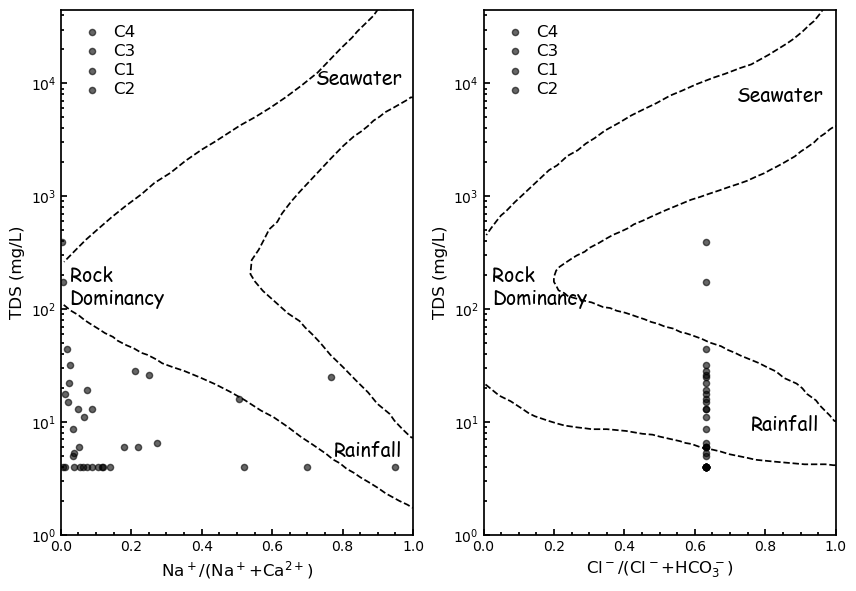

In [7]:
from wqchartpy import gibbs

gibbs.plot(df, unit='mg/L', figname='Gibbs diagram', figformat='jpg')

## Diagrama de Piper
El diagram de Piper fue introducido en 1944 y ha sido desde entonces una herramienta fundamental para el análisis hidrogeoquímico para la clasificación del agua, la determinación del potencial de mezcla y la identificaciín de las reacciones químicas que controlan determinado sistema.

Consiste en un diagrama con dos campos tiangulares que representan los aniones ($SO_4^{2+}$ y $Cl^-$) y los cationes ($Ca^{2+}$ y $Mg^{2+}$) por separado y $Na^+ y $K^+$ y la alcalinidad agrupados. Una vez ubicados los cationes y los aniones en cada triángulo, los puntos se proyectan hacia el rombo y donde se intersecte la proyección de los cationes y los aniones. Este punto permite interpretar el tipo de agua.

A continuación se presentan las caracterisiticas químicas del agua subterránea en las diferentes zonas del diagrama de Pipper:

<img src="Fig_Aux/Pipper_expl.JPG" alt="Pipper_expl" style="width:800px;height:500px;">

y los tipos o facies del agua sobre el diagrama:

<img src="Fig_Aux/Pipper_expl_2.JPG" alt="Pipper_expl_2" style="width:500px;height:500px;">

o resumidos en una tabla:

<img src="Fig_Aux/Facies.JPG" alt="Facies" style="width:600px;height:300px;">


Recientemente, algunos autores han propuesto la inclusión de técnicas estadísticas para su construcción y mejora, buscando visualizar información adicional  como las relaciones $Ca^{2+}$/$Mg^{2+}$ vs $Cl^{-}$/$O_4^{2}$, útil para identificar condiciones de intercambio catiónico. 

<img src="Fig_Aux/ILR_Piper.JPG" alt="ILR_Piper" style="width:800px;height:400px;">
Tomado de: Shelton et al., 2018.

## Consulte el siguiente artículo:
Shelton, J. L., Engle, M. A., Buccianti, A., & Blondes, M. S. (2018). The isometric log-ratio (ilr)-ion plot: A proposed alternative to the Piper diagram. Journal of Geochemical Exploration, 190(September 2017), 130–141. https://doi.org/10.1016/j.gexplo.2018.03.003

### Responda:
¿Qué técnica estadística incorpora esta aproximación?
Describa ventajas y desventajas del uso de esta herramienta.


In [ ]:
#![Pipper_expl_2](Pipper_expl_2.jpg)

from wqchartpy import triangle_piper
# Guarda el diagrama en con el nombre y el formato especificado
triangle_piper.plot(df, unit='mg/L', figname='triangle Piper diagram', figformat='jpg')

In [ ]:
from wqchartpy import contour_piper
contour_piper.plot(df, unit='mg/L',figname='contour-filled Piper diagram', figformat='jpg')

## Diagrama de Durov
Es un digrama tri-linear donde se grafican las concentraciones de los cationes y aniones mayoritarios en meq/L en dos triangulos separados. Las concentrciones en cada triangulo se proyectan sobre el cuadrado central, el cual representa el caracter químico general de la muestra. También es posible graficar otra caracteristica química como los Sólidos Disueltos Totales, el pH, la conductividad, etc.

In [ ]:
from wqchartpy import durvo

durvo.plot(df, unit='mg/L', figname='Durvo diagram', figformat='jpg')

# HFE-D diagram


HFE-D plot created. Saving it to C:\Users\Equipo\HidrogAmb\C1 



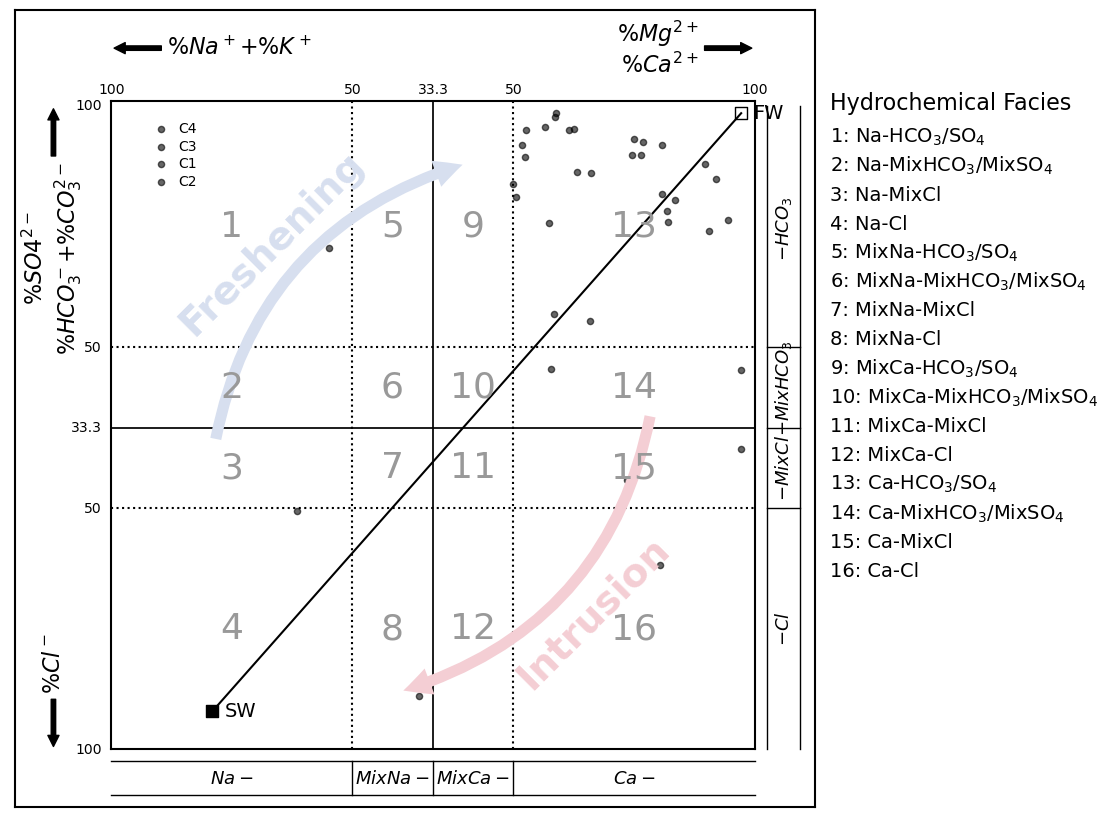

In [5]:
from wqchartpy import hfed

hfed.plot(df, unit='mg/L', figname='HFE-D diagram', figformat='jpg')

# Diagrama de Stiff
En este gráfico, los datos analíticos se grafican en cuatro ejes horizontales paralelos equdistantes uno del otro. Estos diagramas tienen la desventaja que son individuales por muestra. Sin embargo, son de gran utilidad para visualizar las diferencias en la distribución de los aniones y los cationes basado en sus patrones.

Stiff plot created for Aj-01-0095_105515.0_118785.0. Saving it to C:\Users\Equipo\HidrogAmb\C1

Stiff plot created for Aj-11-0201_98171.0_117716.0. Saving it to C:\Users\Equipo\HidrogAmb\C1

Stiff plot created for Pe-02-0007_102459.06_106724.35. Saving it to C:\Users\Equipo\HidrogAmb\C1



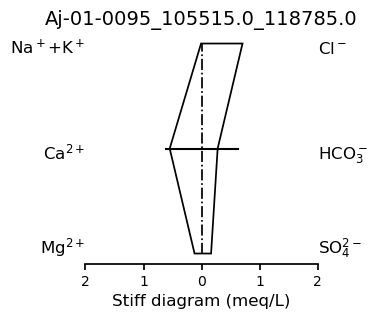

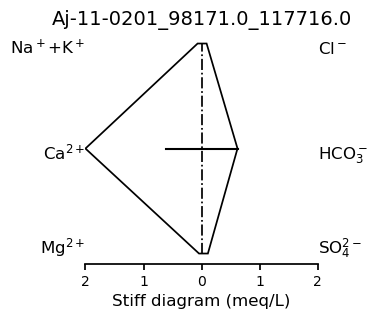

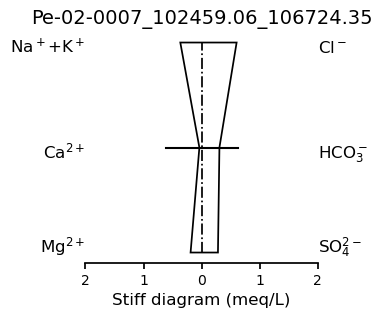

In [8]:
df1 = df.head(3)

from wqchartpy import stiff

stiff.plot(df1, unit='mg/L', figname='Stiff diagram', figformat='jpg')

# Diagrama de Gaillardet
Grafica la relación $Ca^{2+}$/$Na^{+}$ vs $HCO_3^{-}$/$Na^{+}$ y $Ca^{2+}$/$Na^{+}$ vs $Mg^{2+}$/$Na^{+}$, identificando su relación con rocas evaporitas, silicatos o carbonatos.

Gaillardet plot created. Saving it to C:\Users\Equipo\HidrogAmb\C1 



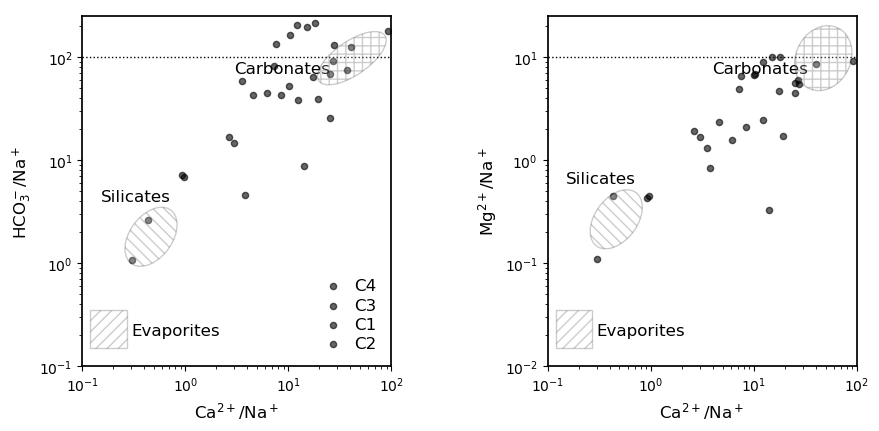

In [9]:
from wqchartpy import gaillardet

gaillardet.plot(df, unit='mg/L', figname='Gaillardet diagram', figformat='jpg')

# Diagrama de Schoeller
Es in grafico en escala semilogaritmica, en donde la abscisa (escala aritmetica) se organizan los iones y cationes a distancias equidistantes. Los puntos son unidos con líneas rectas. Dentro de las ventajas de estos diagramas es que se pueden graficar de manera simulatánea diferentes muestras lo que permite su comparación.


C:\Users\Equipo\AppData\Roaming\Python\Python39\site-packages\wqchartpy\schoeller.py:119: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim([np.min(meqL) * 0.5, np.max(meqL) * 1.5])


Schoeller diagram created. Saving it to C:\Users\Equipo\HidrogAmb\C1 



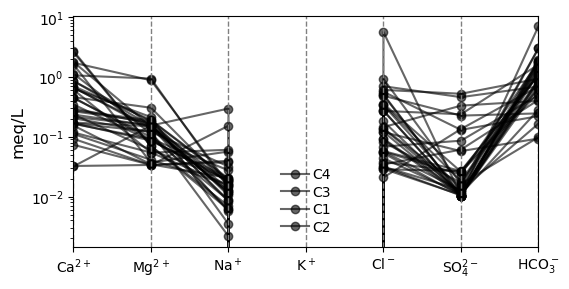

In [10]:
from wqchartpy import schoeller

schoeller.plot(df, unit='mg/L', figname='Schoeller diagram', figformat='jpg')

Se pueden cambiar los colores directamente desde el archivo de entrada (.csv, xlsx, txt, etc) o utilizando la libreria Pandas.

In [17]:
# Change the Color of C1 to yellow
df.loc[df['Label']=='C1', 'Color'] = 'yellow'

# Change the Marker of C2 to square
df.loc[df['Label']=='C2', 'Marker'] = 's'

# Change the Size of C3 to 20
df.loc[df['Label']=='C3', 'Size'] = 20

# Change the Alpha values of C3 to 1.0
df.loc[df['Label']=='C3', 'Alpha'] = 1.0

# Show the new df
#df

Gaillardet plot created. Saving it to C:\Users\Equipo\HidrogAmb\C1 



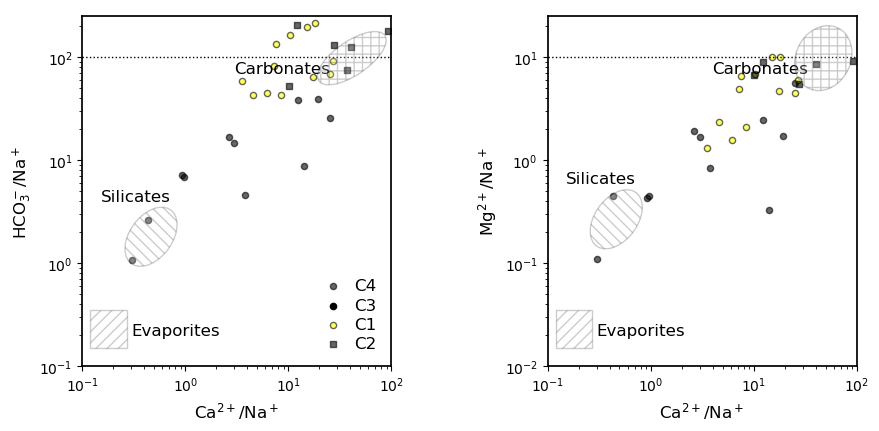

In [14]:
from wqchartpy import gaillardet

gaillardet.plot(df, unit='mg/L', figname='Gaillardet diagram', figformat='jpg')

Trilinear Piper plot created. Saving it to C:\Users\Equipo\HidrogAmb\C1 



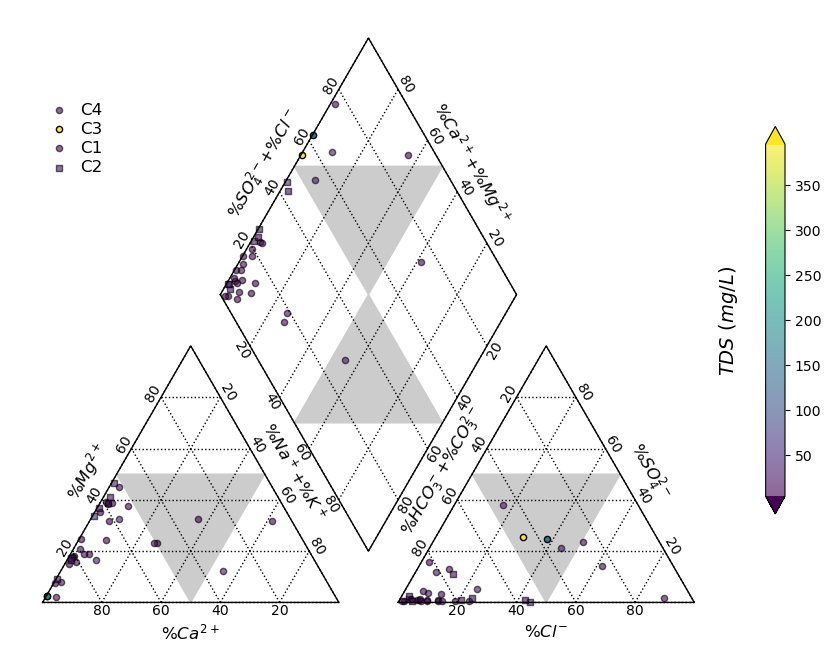

In [16]:
# Cambiar el color de acuerdo con el valor de TDS

df.loc[:, 'Color'] = 1 * df.loc[:, 'TDS']

from wqchartpy import triangle_piper

triangle_piper.plot(df, unit='mg/L', figname='triangle Piper diagram', figformat='jpg')

## Taller 1

Utilizando los datos del campus del mes asignado.

1. Verifique el balance ionico de las muestras.
2. Construya los diagramas básicos para el análisis hidrogeoquímico.
3. Si tiene valores por debajo del límite detectable de los equipos, indique qué tratamiento hizo a dichos datos/muestras.
4. Teniendo en cuenta la geología del campus y la localización de los pozos/piezómetros muestreados, identifique las posible reacciones químicas que se pueden presentar en este sistema.

Tenga en cuenta las tareas asignadas en el drive: https://docs.google.com/spreadsheets/d/1sjZHxBRCYZy7_Irwer1RmZEsUNevZfFO/edit?usp=sharing&ouid=104578729177607683836&rtpof=true&sd=true

Entrega individual el 21 de febrero de 2024.

# Referencias

Clark, I. (2015). Groundwater Geochemistry and Isotopes (T. & F. Group (ed.)). CRC Press.

Ghesquière, O., Walter, J., Chesnaux, R., & Rouleau, A. (2015). Scenarios of groundwater chemical evolution in a region of the Canadian Shield based on multivariate statistical analysis. Journal of Hydrology: Regional Studies, 4, 246–266. https://doi.org/10.1016/j.ejrh.2015.06.004

Shelton, J. L., Engle, M. A., Buccianti, A., & Blondes, M. S. (2018). The isometric log-ratio (ilr)-ion plot: A proposed alternative to the Piper diagram. Journal of Geochemical Exploration, 190(September 2017), 130–141. https://doi.org/10.1016/j.gexplo.2018.03.003

Singhal, B. B. S., & Gupta, R. . (2010). Applied Hydrogeology of fractured rocks.

Yang, J., Liu, H., Tang, Z., Peeters, L., & Ye, M. (2022). Visualization of Aqueous Geochemical Data Using Python and WQChartPy. Groundwater, 60(4), 555–564. https://doi.org/10.1111/gwat.13185
